In [1]:
import pandas as pd 
import pyarrow as pa
import pyarrow.parquet as pq
import datetime     # for general datetime object handling
import rfc3339      # for date object -> date string
import iso8601      # for date string -> date object
def get_date_object(date_string):
    return iso8601.parse_date(date_string)
def get_date_string(date_object):
    return rfc3339.rfc3339(date_object)

try:
    df = pd.read_parquet('comptage_2018_2019.parquet',parse_dates=True,engine='pyarrow')
except:
    pass

In [2]:
df = pd.read_parquet('comptage_2018_2019.parquet',engine='pyarrow')
df.head()

,iu_ac,libelle,iu_nd_amont,iu_nd_aval,t_1h,q,k,etat_trafic
0,6532,Tolbiac,2626,3386,2018-01-02T06:00:00+01:00,14.0,0.17667,1
1,6532,Tolbiac,2626,3386,2018-01-03T01:00:00+01:00,114.0,1.42778,1
2,6532,Tolbiac,2626,3386,2018-01-04T08:00:00+01:00,102.0,1.28111,1
3,6532,Tolbiac,2626,3386,2018-01-04T11:00:00+01:00,341.0,4.56556,1
4,6532,Tolbiac,2626,3386,2018-01-04T23:00:00+01:00,200.0,2.21167,1


In [3]:
df.head()

,iu_ac,libelle,iu_nd_amont,iu_nd_aval,t_1h,q,k,etat_trafic
0,6532,Tolbiac,2626,3386,2018-01-02T06:00:00+01:00,14.0,0.17667,1
1,6532,Tolbiac,2626,3386,2018-01-03T01:00:00+01:00,114.0,1.42778,1
2,6532,Tolbiac,2626,3386,2018-01-04T08:00:00+01:00,102.0,1.28111,1
3,6532,Tolbiac,2626,3386,2018-01-04T11:00:00+01:00,341.0,4.56556,1
4,6532,Tolbiac,2626,3386,2018-01-04T23:00:00+01:00,200.0,2.21167,1


In [ ]:
#convert timestamp in pandas date object
print("start")

from datetime import datetime, timedelta
df.t_1h=df.t_1h.astype(str).str[0:19].apply(get_date_object)
print("ok this was the first")

In [6]:

#we create a new column date and weekday
df['just_date'] = df.t_1h.dt.date

In [8]:
df.t_1h=df.t_1h-timedelta(hours=2)
print("ok this was the third")

ok this was the third


In [10]:
df['WEEKDAY'] = pd.to_datetime(df['just_date']).dt.dayofweek
print("ok this was the fourth")
#create column week end
df['weekend_indi'] = 0 
df.loc[df['WEEKDAY'].isin([5, 6]), 'weekend_indi'] = 1
print("ok this was the fifth")
df['HOUR'] = df.t_1h.dt.time
print("ok this was the sixth")
df['HOUR']=df['HOUR'].astype(str).str[0:2]
print("ok this was the seventh")
df['HOUR']=df['HOUR'].astype(int)
print("ok this is is done, do not forget to save")

try:
    table = pa.Table.from_pandas(df, preserve_index=True)
    pq.write_table(table, 'comptage_2018_2019_prepro.parquet')
except:
    print('not working')
    pass

ok this was the fourth
ok this was the fifth
ok this was the sixth
ok this was the seventh
ok this is is done, do not forget to save


In [12]:
df2=df.set_index("t_1h")

C:\Users\glabarre\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


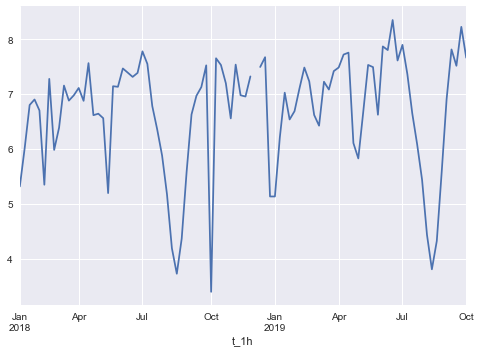

In [15]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
df2.k.resample("W").mean().plot()

C:\Users\glabarre\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


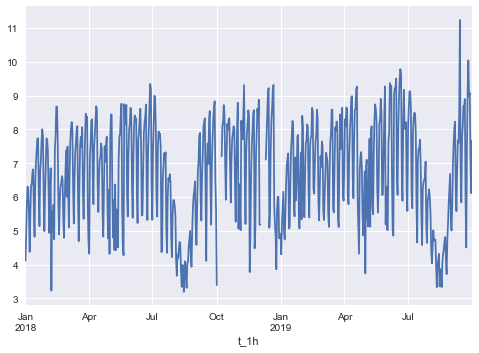

In [44]:

df2.k.resample("D").mean().plot()

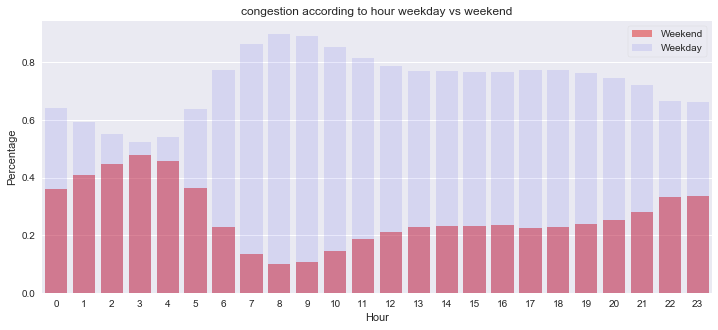

In [17]:
import seaborn as sns
Hours = [x for x in range(0,24)]

Weekend = []
Weekday = []

for i in Hours:
    Weekend.append(
        sum((df2[(df2["HOUR"]==i) & (df2["weekend_indi"]== 1)]["k"]).fillna(0))/
        sum((df2[(df2["HOUR"]==i)]["k"]).fillna(0)))
    Weekday.append(
        sum((df2[(df2["HOUR"]==i) & (df2["weekend_indi"]== 0)]["k"]).fillna(0))/
        sum((df2[(df2["HOUR"]==i)]["k"]).fillna(0)))

f,ax = plt.subplots(figsize=(12,5))
sns.barplot(x=Hours, y=Weekend, label='Weekend', color='r', alpha = 0.5)
sns.barplot(x=Hours, y=Weekday, label='Weekday', color='b', alpha = 0.1)

ax.set(xlabel='Hour', ylabel='Percentage', title='congestion according to hour weekday vs weekend')
ax.legend(loc='upper right',frameon= True)

plt.show()

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

before PCA (626, 24)
after PCA (626, 2)
[0 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2
 1 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2
 2 0 0 2 2 2 2 2 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 2 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 2 1 1 1 1 0 0 1 2 1 1 1 0 0 1 1 1
 1 1 0 0 1 2 1 1 1 0 0 1 1 2 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0
 2 1 1 1 1 0 0 1 1 1 1 1 0 0 0 2 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 2
 2 2 0 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 0 2 2
 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 2 2 0 0 2 0 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2
 2 0 0 2 2 2 1 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0
 0 2 2 2 2 2 0 0 2 2 2 1 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0

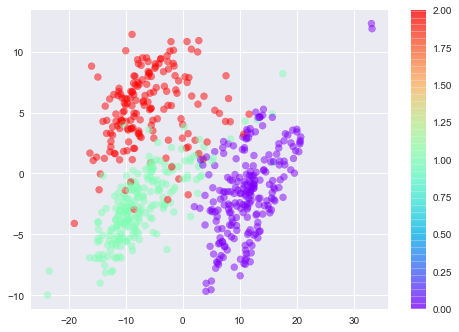

In [22]:
#pivoted table to cluster the days 
pivoted_days=df2.pivot_table("k",index=df2.index.time,columns=df2.just_date)
#pivoted_days.head()
#pivoted_days.plot(legend=False,alpha=0.1,figsize=(15,10))

X = pivoted_days.fillna(0).T.values
print('before PCA',X.shape)
X2 = PCA(2,svd_solver='full').fit_transform(X)
print('after PCA',X2.shape)

#plt.scatter(X2[:,0],X2[:,1])


gmm = GaussianMixture(3)
gmm.fit(X)
labels =gmm.predict(X)
print(labels)

plt.scatter(X2[:,0],X2[:,1],c=labels,cmap='rainbow',alpha=0.5)
plt.colorbar()

In [28]:
dayofweek=pd.DatetimeIndex(pivoted_days.columns).dayofweek

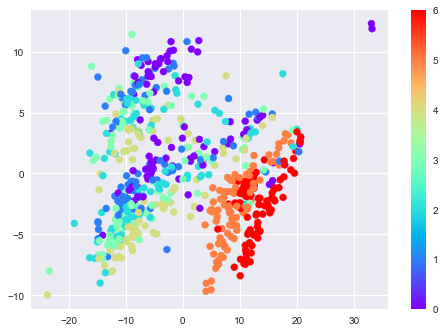

In [30]:
plt.scatter(X2[:,0],X2[:,1],c=dayofweek,cmap='rainbow')
plt.colorbar()

In [41]:
dates=pd.DatetimeIndex(pivoted_days.columns)
dates[(labels==2) & (dayofweek>5)]

DatetimeIndex([], dtype='datetime64[ns]', name='just_date', freq=None)

before PCA (696, 24)
after PCA (696, 2)
[1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0

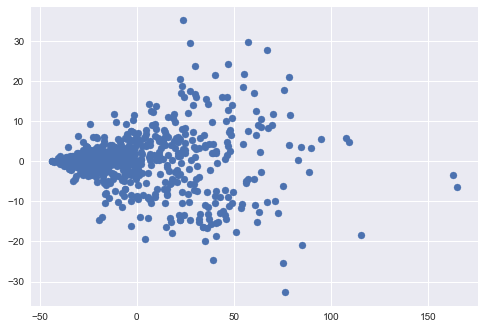

In [43]:
#pivoted table to cluster the sensors 
pivoted_sensors=df2.pivot_table("k",index=df2.index.time,columns=df2.libelle)
#pivoted_sensors.head()
#pivoted_sensors.plot(legend=False,alpha=0.1,figsize=(15,10))

X = pivoted_sensors.fillna(0).T.values
print("before PCA",X.shape)
X2 = PCA(2,svd_solver='full').fit_transform(X)
print("after PCA",X2.shape)

plt.scatter(X2[:,0],X2[:,1])


gmm = GaussianMixture(2)
gmm.fit(X)
labels =gmm.predict(X)
print(labels)

#plt.scatter(X2[:,0],X2[:,1],c=labels,cmap='rainbow',alpha=0.5)
#plt.colorbar()

pandas.core.indexes.datetimes.DatetimeIndex